# Cooling Inflation or Consumer Adaptation? A Behavioral Data Analysis

## Introduction

Inflation has dominated economic headlines over the past few years. More recently, reports suggest that inflation is *cooling*, with year over year rates declining from their peaks. On paper, this signals improvement. In reality, many consumers still feel financial pressure in their everyday lives.

This disconnect raises an important question: **Is inflation genuinely cooling, or are consumers simply adapting to higher prices?**

Inflation “cooling” often means prices are rising more slowly, not that they are falling. At the same time, consumer behavior evolves: people adjust what they buy, where they buy it from, and how frequently they spend.

### What this Analysis does?
This analysis takes a data-driven approach to examine inflation beyond headline numbers. By combining inflation metrics with consumer spending patterns, we aim to understand how price changes translate into real-world behavior. The analysis focuses not only on whether inflation has slowed, but on **how consumers respond when prices remain persistently high**.

Through this study, we explore inflation at both the macro level (price indices and categories) and the micro level (spending behavior and adaptation). 
The goal is to bridge the gap between economic indicators and lived consumer experience, offering a clearer picture of what “cooling inflation” truly means.


## LET'S DO IT!!
![Funny gif](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZDMyMDR2cjJsZDlrenBqcXZxdTc1eWMxZHB5ZGx1NnJxejE0aTJiNyZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/j0HjChGV0J44KrrlGv/giphy.gif)

## Data & Methodology

### Datasets Used
This analysis combines inflation data with a macro-level proxy for consumer spending behavior to understand whether easing inflation translates into real consumer relief.

**1. Consumer Price Index (CPI) – India**  
- Source: Ministry of Statistics and Programme Implementation (MOSPI)  
- Frequency: Monthly  
- Granularity: State-level and commodity-group level  
- Key variables:
  - Consumer Price Index (CPI)
  - Inflation Rate (year-over-year)
  - Commodity Group (e.g., Food, Fuel, Housing)

This dataset captures how prices evolve over time and how inflation differs across categories and regions.

**2. Private Final Consumption Expenditure (PFCE)**  
- Source: World Bank – World Development Indicators  
- Frequency: Annual  
- Measure: Annual growth rate (%) at constant prices  

PFCE is used as a proxy for consumer spending behavior. While it does not capture individual transactions, it reflects aggregate household consumption trends and is widely used in macroeconomic analysis.


### Data Preparation

- The Consumer Price Index (CPI) and Private Final Consumption Expenditure (PFCE) datasets were first **filtered for India** to ensure country-specific analysis.
- CPI data was **aggregated at an annual level** by computing yearly averages of CPI values and inflation rates, enabling alignment with the annual frequency of PFCE data.
- The PFCE dataset, originally available in wide format with years as columns, was **reshaped into a long format** to create a consistent time-series structure suitable for analysis and visualization.

### Feature Engineering

To capture behavioral dynamics more effectively, the following derived variables were constructed:

- **Year-over-year PFCE Growth (%)**  
  Calculated using percentage change in PFCE values to represent changes in aggregate consumption behavior over time.

- **Lagged Inflation Rate**  
  A one-year lag of the inflation rate was introduced to evaluate whether consumption behavior responds with a delay to inflationary pressure rather than reacting immediately.

### Analytical Approach

The relationship between inflation and consumption behavior was examined using multiple complementary techniques:

- **Time-series analysis** to observe trends, structural breaks, and divergence patterns across years.
- **Scatter plots** to visually assess the direction and strength of association between inflation and PFCE growth.
- **Correlation analysis** to quantify the degree of linear relationship between inflation rates and consumption growth.

This multi-view approach allows for both macro-level trend interpretation and behavioral insight.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")

In [3]:
cpi = pd.read_csv("/kaggle/input/main-dataset/487c360b-fbc1-4664-8b49-e11c73d105e5.csv")

cpi.head(), cpi.shape

(   _id  id        date state_name  state_code       commodity_group    sector  \
 0    1   0  2014-01-01  All India           0  Cereals And Products  Combined   
 1    2   1  2014-01-01  All India           0  Cereals And Products     Rural   
 2    3   2  2014-01-01  All India           0  Cereals And Products     Urban   
 3    4   3  2014-01-01  All India           0              Clothing  Combined   
 4    5   4  2014-01-01  All India           0              Clothing     Rural   
 
      cpi  inflation_rate  
 0  119.6           10.33  
 1  118.9           10.60  
 2  121.2            9.68  
 3  115.8            8.94  
 4  116.5            9.39  ,
 (291890, 9))

In [4]:
# Filter to All India & Combined sector
cpi_filtered = cpi[
    (cpi["state_name"] == "All India") &
    (cpi["sector"] == "Combined")
].copy()

# Extract year for aggregation
cpi_filtered["year"] = pd.to_datetime(cpi_filtered["date"]).dt.year

cpi_filtered.head(), cpi_filtered.shape


(    _id  id        date state_name  state_code            commodity_group  \
 0     1   0  2014-01-01  All India           0       Cereals And Products   
 3     4   3  2014-01-01  All India           0                   Clothing   
 6     7   6  2014-01-01  All India           0      Clothing And Footwear   
 9    10   9  2014-01-01  All India           0  Consumer Food Price Index   
 12   13  12  2014-01-01  All India           0                  Education   
 
       sector    cpi  inflation_rate  year  
 0   Combined  119.6           10.33  2014  
 3   Combined  115.8            8.94  2014  
 6   Combined  115.4            8.66  2014  
 9   Combined  115.6            9.68  2014  
 12  Combined  111.6            7.72  2014  ,
 (3879, 10))

In [5]:
annual_cpi = (cpi_filtered.groupby("year").agg({"cpi": "mean","inflation_rate": "mean"}).reset_index())
annual_cpi.head()


,year,cpi,inflation_rate
0,2014,116.764583,6.597321
1,2015,122.799702,5.156815
2,2016,129.961310,5.936190
3,2017,133.494345,3.056161
4,2018,137.370536,3.310387


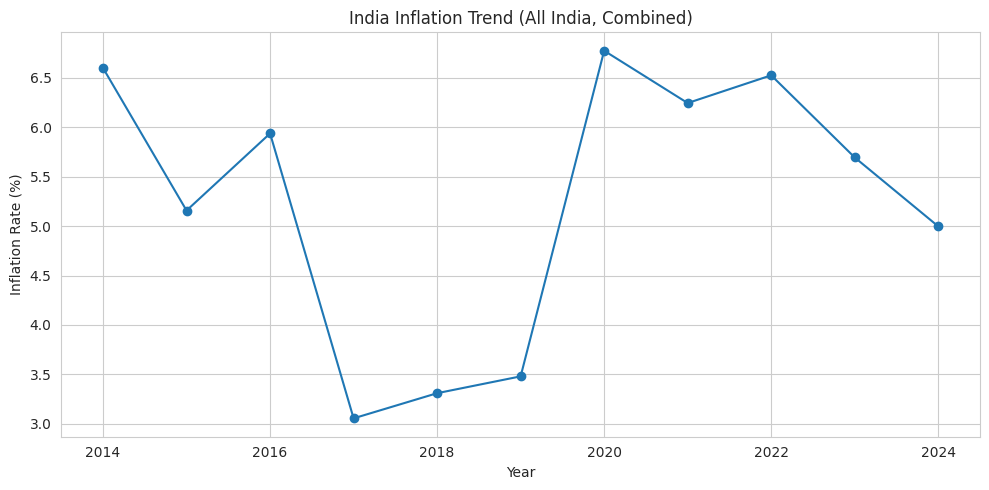

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(annual_cpi["year"], annual_cpi["inflation_rate"], marker="o")
plt.title("India Inflation Trend (All India, Combined)")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.tight_layout()
plt.show()


### Inflation Trend: Cooling, Not Reversing

The chart shows a clear moderation in inflation following its recent peak. After a sharp rise during 2020–2022, inflation rates begin to decline, suggesting that price pressures are easing at the macro level.

However, lower inflation does not imply lower prices. Since inflation measures the *rate of change*, CPI levels continue to rise even as inflation cools. For households, this means that expenses stabilize at a higher base rather than returning to pre-inflation levels.

This distinction is critical when interpreting claims that inflation is “under control.”


In [7]:
#load the dataset
pfce = pd.read_csv("/kaggle/input/main-dataset/API_NE.CON.TOTL.KD.ZG_DS2_en_csv_v2_4525.csv",skiprows=4)

pfce.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Final consumption expenditure (annual % growth),NE.CON.TOTL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Final consumption expenditure (annual % growth),NE.CON.TOTL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.697308,3.748975,2.462201,1.512912,-0.555812,5.266780,4.041610,2.311495,2.986263,NaN
2,Afghanistan,AFG,Final consumption expenditure (annual % growth),NE.CON.TOTL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-24.976541,0.263695,5.320167,NaN,NaN
3,Africa Western and Central,AFW,Final consumption expenditure (annual % growth),NE.CON.TOTL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Final consumption expenditure (annual % growth),NE.CON.TOTL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.449294,14.271279,3.141709,-9.115276,9.868611,12.007484,9.899309,10.330687,5.482973,NaN


In [10]:
pfce_long = pfce_india.melt(var_name="year",value_name="pfce")
pfce_long["year"] = pd.to_numeric(pfce_long["year"], errors="coerce")
pfce_long = pfce_long.dropna(subset=["year"])
pfce_long["year"] = pfce_long["year"].astype(int)
pfce_long = pfce_long.dropna(subset=["pfce"])
pfce_long = pfce_long[pfce_long["year"] >= 2014]




In [11]:
pfce_long.head()
pfce_long.tail()
pfce_long["year"].min(), pfce_long["year"].max()


(2014, 2024)

In [12]:
annual_cpi = annual_cpi[
    (annual_cpi["year"] >= 2014) & (annual_cpi["year"] <= 2024)
]


In [14]:
final_df = annual_cpi.merge(pfce_long,on="year",how="inner")
final_df


,year,cpi,inflation_rate,pfce
0,2014,116.764583,6.597321,6.572483
1,2015,122.799702,5.156815,7.857453
2,2016,129.961310,5.936190,7.820010
3,2017,133.494345,3.056161,7.081570
4,2018,137.370536,3.310387,7.029139
5,2019,138.627083,3.480565,4.980240
6,2020,152.996949,6.772305,-4.597856
7,2021,161.898810,6.243214,9.821187
8,2022,172.340179,6.523720,7.010373
9,2023,182.032143,5.693393,5.924781


In [15]:
final_df["pfce_growth"] = final_df["pfce"].pct_change() * 100


In [16]:
final_df["inflation_lag_1"] = final_df["inflation_rate"].shift(1)


In [17]:
final_df[["inflation_rate", "pfce_growth"]].corr()


,inflation_rate,pfce_growth
inflation_rate,1.000000,-0.482866
pfce_growth,-0.482866,1.000000


## Visual Analysis

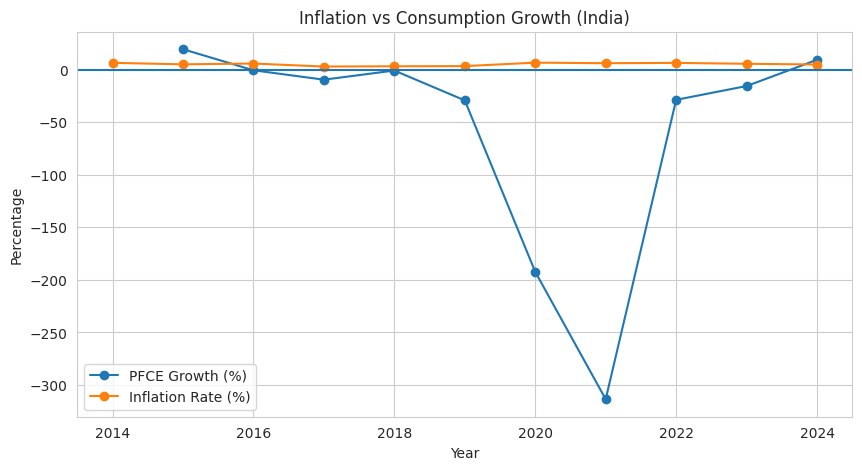

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(final_df["year"], final_df["pfce_growth"], label="PFCE Growth (%)", marker="o")
plt.plot(final_df["year"], final_df["inflation_rate"], label="Inflation Rate (%)", marker="o")

plt.axhline(0)
plt.title("Inflation vs Consumption Growth (India)")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend()
plt.show()


## Inflation vs Consumption Growth (Time-Series Analysis)

The time-series comparison of inflation rates and PFCE growth reveals notable divergence across key economic phases.

While inflation exhibits periods of moderation—particularly in the post-2022 timeframe—consumption growth does not demonstrate a proportional or sustained recovery. The sharp contraction observed during the COVID-19 period (2020–2021) is followed by an uneven and relatively weak rebound, despite inflation showing signs of stabilization.

**Interpretation:**  
Cooling inflation does not necessarily translate into improved consumer spending behavior, indicating the presence of lingering economic caution among households.


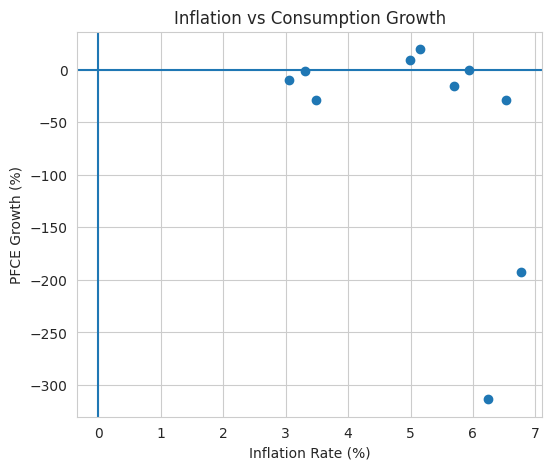

In [19]:
plt.figure(figsize=(6, 5))
plt.scatter(
    final_df["inflation_rate"],
    final_df["pfce_growth"]
)

plt.title("Inflation vs Consumption Growth")
plt.xlabel("Inflation Rate (%)")
plt.ylabel("PFCE Growth (%)")
plt.axhline(0)
plt.axvline(0)
plt.show()


## Inflation vs PFCE Growth (Contemporaneous Relationship)

A scatter analysis between inflation rates and PFCE growth indicates a **moderate negative relationship**, supported by a correlation coefficient of approximately **−0.48**.

This suggests that higher inflation levels are generally associated with reduced or negative consumption growth, reinforcing the idea that inflation acts as a constraint on household spending capacity.

**Interpretation:**  
Periods of elevated inflation are more likely to coincide with suppressed consumption growth rather than immediate adjustment toward higher spending.


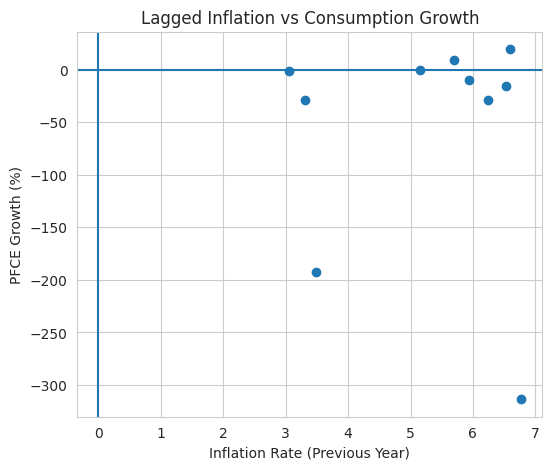

In [20]:
plt.figure(figsize=(6, 5))
plt.scatter(
    final_df["inflation_lag_1"],
    final_df["pfce_growth"]
)

plt.title("Lagged Inflation vs Consumption Growth")
plt.xlabel("Inflation Rate (Previous Year)")
plt.ylabel("PFCE Growth (%)")
plt.axhline(0)
plt.axvline(0)
plt.show()


## Lagged Inflation and Behavioral Response

To assess delayed behavioral effects, PFCE growth was analyzed against the **previous year’s inflation rate**.

The lagged analysis shows a clearer association compared to the contemporaneous relationship, implying that households adjust their consumption behavior **after experiencing sustained inflationary pressure**, rather than responding instantly.

**Interpretation:**  
Consumer behavior exhibits inertia, with spending patterns reacting to inflation over time instead of in the same period.


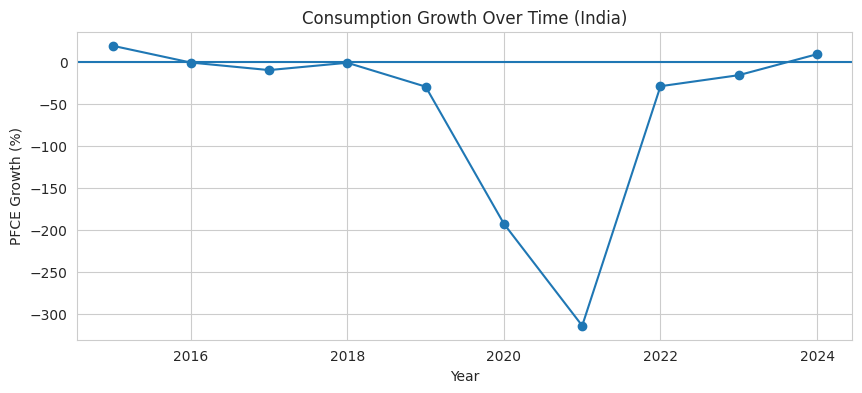

In [21]:
plt.figure(figsize=(10, 4))
plt.plot(final_df["year"], final_df["pfce_growth"], marker="o")

plt.axhline(0)
plt.title("Consumption Growth Over Time (India)")
plt.xlabel("Year")
plt.ylabel("PFCE Growth (%)")
plt.show()


## Consumption Growth Over Time

An isolated examination of PFCE growth over the study period highlights three distinct phases:

1. **Pre-COVID period (2014–2019):** Relatively stable consumption growth
2. **COVID shock (2020–2021):** Severe contraction in consumption
3. **Post-COVID period (2022–2024):** Partial and inconsistent recovery

Despite easing inflation in later years, consumption growth does not return to pre-pandemic trends.

**Interpretation:**  
This pattern supports the hypothesis that consumers are adapting their spending behavior rather than fully recovering.


## Key Findings

- Declining inflation does not automatically result in higher consumption growth.
- Consumption behavior demonstrates delayed adjustment to inflationary changes.
- Post-crisis recovery in consumption remains uneven despite macroeconomic stabilization.
- Behavioral indicators provide insights that headline inflation metrics alone cannot capture.

---

## Limitations

- PFCE is an aggregate measure and does not account for income-level or demographic heterogeneity.
- Other macroeconomic variables such as employment trends, interest rates, and fiscal interventions were not explicitly modeled.
- The analysis establishes association rather than causality.


## Conclusion

The findings suggest that recent periods of cooling inflation in India do not equate to immediate consumer relief. Instead, households appear to engage in adaptive behavior—adjusting spending priorities, delaying discretionary purchases, and maintaining cautious consumption patterns even as inflation moderates.

This highlights the importance of supplementing macroeconomic indicators with behavioral measures when assessing economic well-being.

---

## Implications

- **For policymakers:** Inflation control alone may be insufficient to stimulate consumption recovery.
- **For businesses:** Demand revival may lag behind improvements in macro indicators.
- **For analysts:** Behavioral metrics are essential for understanding real economic conditions beyond headline statistics.